In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from pprint import pprint

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import tensorflow as tf

In [3]:
df = pd.read_csv(r'C:\Users\RDITLBMJ\Documents\Data_ML\waterquality.csv')
df.head()

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [6]:
df = df.drop(columns=['STATION CODE','LOCATIONS', 'STATE'])
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [8]:
# Filling Null Values using K-Nearest Neighbor Imputation
impute_knn = KNNImputer(n_neighbors=5,weights='distance')
df_imputed = impute_knn.fit_transform(df)

In [10]:
df = pd.DataFrame(df_imputed, columns=['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM'])
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [12]:
df.isnull().sum()

TEMP                   0
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE_N_NITRITE_N    0
FECAL_COLIFORM         0
TOTAL_COLIFORM         0
dtype: int64

In [14]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.DO,0.20,9.5)
df['sub_indx_DO']=x

In [16]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.pH,0.15,7.5)
df['sub_indx_pH']=x

In [18]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.CONDUCTIVITY,0.10,1000)
df['sub_indx_CONDUCTIVITY']=x

In [20]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.BOD,0.15,3)
df['sub_indx_BOD']=x

In [22]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.NITRATE_N_NITRITE_N,0.10,5)
df['sub_indx_NITRATE_N_NITRITE_N']=x

In [24]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.FECAL_COLIFORM,0.15,500)
df['sub_indx_FECAL_COLIFORM']=x

In [26]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.TOTAL_COLIFORM,0.15,2500)
df['sub_indx_TOTAL_COLIFORM']=x

In [28]:
sum_sub_indx=df.iloc[:,8:]
final_wqi=sum_sub_indx.sum(axis=1)
final_wqi

0      58.551684
1      54.083579
2      72.296947
3      70.386947
4      54.262000
         ...    
529    39.077158
530    46.167474
531    47.246526
532    51.873579
533    81.586421
Length: 534, dtype: float64

In [30]:
df['WQI']=final_wqi
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,sub_indx_DO,sub_indx_pH,sub_indx_CONDUCTIVITY,sub_indx_BOD,sub_indx_NITRATE_N_NITRITE_N,sub_indx_FECAL_COLIFORM,sub_indx_TOTAL_COLIFORM,WQI
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,13.473684,16.2,7.35,17.0,4.00,0.09,0.438,58.551684
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,12.631579,16.0,2.70,15.5,4.00,2.16,1.092,54.083579
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,11.578947,15.6,3.55,21.0,18.00,1.77,0.798,72.296947
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,11.578947,15.6,3.71,28.0,7.10,2.70,1.698,70.386947
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,12.000000,15.8,2.94,16.0,5.38,1.35,0.792,54.262000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,9.263158,16.2,5.38,6.0,2.00,0.15,0.084,39.077158
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,11.789474,16.8,5.91,5.5,6.00,0.12,0.048,46.167474
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,12.210526,17.0,5.88,6.0,6.00,0.12,0.036,47.246526
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0,8.631579,15.8,11.33,11.5,4.00,0.21,0.402,51.873579


In [32]:
X = df.drop(columns=['WQI'])
y = df['WQI']

In [34]:
y_df = pd.DataFrame(y)

In [36]:
# Standardizing Data Using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y_df)

In [38]:
# Train-test split RFR
X_train_rfr, X_test_rfr, y_train_rfr, y_test_rfr = train_test_split(X_scaled, y_scaled, random_state=42, test_size=0.2)

In [40]:
# Train-test split SVR
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_scaled, y_scaled, random_state=42, test_size=0.2)

In [42]:
# Train-test split NN
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_scaled, random_state=42, test_size=0.2)

In [44]:
y_train_svr = y_train_svr.ravel()

In [46]:
y_train_rfr = y_train_rfr.ravel()

In [48]:
y_train_nn = y_train_nn.ravel()

In [50]:
rf = RandomForestRegressor(random_state=42)

In [52]:
svr = SVR(kernel='linear')

In [54]:
nn = tf.keras.models.load_model(r"C:\Users\RDITLBMJ\Documents\AMPL\ampl_dir\all_run_dir\wqi_run_dir\results_WQI_measure\saved_models\WQI_WQI_estimate_top_0_model.keras")

In [56]:
nn.fit(X_train_nn, y_train_nn, epochs=20, batch_size=32)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2894 - mse: 0.3001
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3532 - mse: 0.9079 
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2831 - mse: 0.2393 
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3097 - mse: 0.3975 
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3058 - mse: 0.4188 
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2839 - mse: 0.2021 
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3316 - mse: 0.7205 
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3047 - mse: 0.4633 
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3001 - mse: 0.3874 
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3341 - mse: 0.6432 
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3339 - mse: 0.5304 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3362 - mse: 0.8727 
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━

In [58]:
# Make predictions on the test set
nn_pred = nn.predict(X_test_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [60]:
# Evaluation of Model NN
mae_nn = mean_absolute_error(y_test_nn, nn_pred)
mse_nn = mean_squared_error(y_test_nn, nn_pred)
r2_nn = r2_score(y_test_nn, nn_pred)
print(f'Mean Absolute Error: {mae_nn}', f'Mean Squared Error: {mse_nn}', f'R2 Score: {r2_nn}')

Mean Absolute Error: 0.49407849200420956 Mean Squared Error: 1.9456919007238176 R2 Score: 0.30967490043897306


In [62]:
# Wrap the Keras model in a KerasRegressor
def create_keras_model():
    return nn

In [64]:
keras_regressor = KerasRegressor(
    model=create_keras_model,
    epochs=10,  # Set the number of epochs for training if needed
    batch_size=32,  # Set the batch size if needed
    verbose=0
)

In [66]:
keras_regressor.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32)

KerasRegressor(
	model=<function create_keras_model at 0x000001D302359BC0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
)

In [68]:
# Make predictions on the test set
keras_pred = keras_regressor.predict(X_test_nn)

In [70]:
# Evaluation of Model Keras Model
mae_keras = mean_absolute_error(y_test_nn, keras_pred)
mse_keras = mean_squared_error(y_test_nn, keras_pred)
r2_keras = r2_score(y_test_nn, keras_pred)
print(f'Mean Absolute Error: {mae_keras}', f'Mean Squared Error: {mse_keras}', f'R2 Score: {r2_keras}')

Mean Absolute Error: 0.49110942434459315 Mean Squared Error: 1.9492959942878956 R2 Score: 0.30839617987302737


In [72]:
# Training Model using default parameters
rf.fit(X_train_rfr, y_train_rfr)

RandomForestRegressor(random_state=42)

In [74]:
# Training Model
svr.fit(X_train_svr, y_train_svr)

SVR(kernel='linear')

In [76]:
# Making Predictions
y_pred_rfr = rf.predict(X_test_rfr)

In [78]:
# Making Predictions
y_pred_svr = svr.predict(X_test_svr)

In [80]:
# Evaluation of Model RFR
mae_rfr = mean_absolute_error(y_test_rfr, y_pred_rfr)
mse_rfr = mean_squared_error(y_test_rfr, y_pred_rfr)
r2_rfr = r2_score(y_test_rfr, y_pred_rfr)
print(f'Mean Absolute Error: {mae_rfr}', f'Mean Squared Error: {mse_rfr}', f'R2 Score: {r2_rfr}')

Mean Absolute Error: 0.08058239016494362 Mean Squared Error: 0.3696677781401923 R2 Score: 0.8688430857659436


In [82]:
# Evaluation of Model SVR
mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
r2_svr = r2_score(y_test_svr, y_pred_svr)
print(f'Mean Absolute Error: {mae_svr}', f'Mean Squared Error: {mse_svr}', f'R2 Score: {r2_svr}')

Mean Absolute Error: 0.023418225107134226 Mean Squared Error: 0.001132744665659498 R2 Score: 0.9995981059109061


In [84]:
# Average the predictions
average_pred = (y_pred_svr + y_pred_rfr + keras_pred) / 3

In [86]:
# Evaluation of Averaging Ensemble
mae_avg = mean_absolute_error(y_test_svr, average_pred)
mse_avg = mean_squared_error(y_test_svr, average_pred)
r2_avg = r2_score(y_test_svr, average_pred)
print(f'Mean Absolute Error: {mae_avg}', f'Mean Squared Error: {mse_avg}', f'R2 Score: {r2_avg}')

Mean Absolute Error: 0.1898308866994752 Mean Squared Error: 0.4124586566911687 R2 Score: 0.8536610225189221


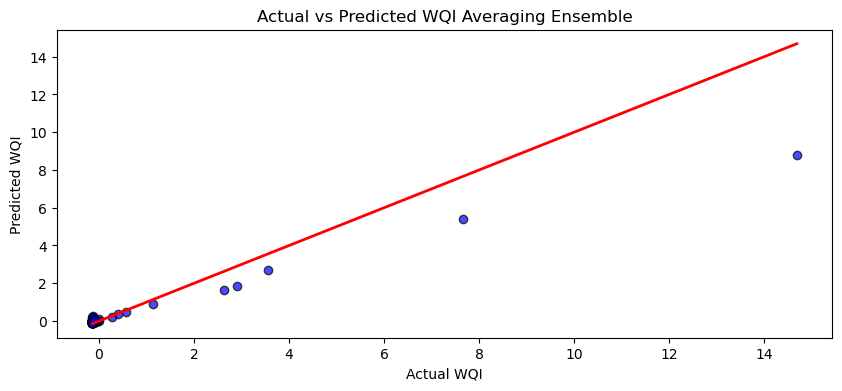

In [90]:
# Plot the results of Averaging Ensemble
plt.figure(figsize=(10, 4))
plt.scatter(y_test_svr, average_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test_svr), max(y_test_svr)], [min(y_test_svr), max(y_test_svr)], color='red', linewidth=2)
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.title('Actual vs Predicted WQI Averaging Ensemble')
plt.show()